<a href="https://colab.research.google.com/github/RedCloudbt/K-means_aplicacion/blob/main/Algoritmo_Kmeans_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de las librerias a utilizar

In [ ]:
import pandas as pd                  # para analisis de datos y lo definimos como np
import numpy as np                   # para calculos cientificos y lo definimos como np
import  matplotlib.pyplot as plt     # Para crear graficos de calidad y lo definimos como plt
from sklearn.cluster import KMeans   # Para poder llevar a cabo el algoritmo Kmeans
from sklearn.decomposition import PCA

# Asignar DATASET

In [ ]:
vinos = pd.read_csv('caracteristicas de vinos.csv')   # Importanos el dataset y lo definimos como "Vinos"
vinos.info()                                          # comando para ver las caracteristicas del dataset
vinos.head()                                          # Analizamos las columnas

In [ ]:
vinos_variables=vinos.drop(['Vino'], axis=1)
vinos_variables.describe()

In [ ]:
vinos_norm=(vinos_variables-vinos_variables.min())/(vinos_variables.max()-vinos_variables.min()) #Normalizamos los datos
vinos_norm

In [ ]:
vinos_norm.describe()

# Calcular numero de clousters

In [ ]:
wcss =[]                                                           #Codo de Jambú
for i in range(1, 11):
  kmeans = KMeans (n_clusters = i , max_iter=200)
  kmeans.fit(vinos_norm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Codo de jambú")
plt.xlabel("Numero de Clusters")
plt.ylabel("WCSS")
plt.show()

NameError: ignored

# Aplicación del Kmeans

In [ ]:
clustering = KMeans(n_clusters =3, max_iter=200)
clustering.fit(vinos_norm)
vinos['KMeans_Clusters'] = clustering.labels_ 
vinos.head

# PCA para mostrar visualmente 

In [ ]:
pca= PCA (n_components=2)
pca_vinos=pca.fit_transform(vinos_norm)
pca_vinos_df=pd.DataFrame(data=pca_vinos,columns=['Componente_1','Componente_2'])
pca_nombres_vinos=pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)
pca_nombres_vinos

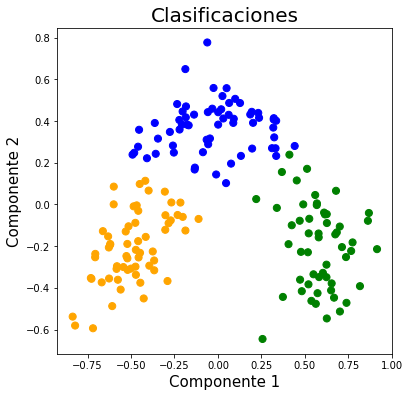

In [ ]:
fig= plt.figure(figsize= (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1',fontsize = 15)
ax.set_ylabel('Componente 2',fontsize = 15)
ax.set_title('Clasificaciones',fontsize = 20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_nombres_vinos.Componente_1, y=pca_nombres_vinos.Componente_2,
           c=color_theme[pca_nombres_vinos.KMeans_Clusters], s=50)
plt.show()

# Grabar los clusters

In [ ]:
vinos.to_csv('Vinos con K-means.csv')